## Analyze the hepmc files


In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)


/tmp/ipykernel_345257/431883554.py:19: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [2]:

params = {'legend.fontsize': '30',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'40',
         'ytick.labelsize':'40',
         'axes.labelsize': '30',
         'axes.titlesize': '40'}
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2


plt.rcParams['ytick.major.size'] = 20
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')

In [3]:
#### CHOOSE ELECTRON OR PION ('electron' and 'Pion')

FilePathReco="/home/bishnu/EIC/Data/hepmc/"
## PATH WHERE FIGURE ARE SAVED  
PathToPlot='/home/bishnu/UCR_EIC/Plots/'        
Energy_Threshold=0.06 #(Mev)
Time_Threshold=200 #ns
MIP=0.6 #GeV
Gev_To_MeV=1000
Sigma_For_leakage=3
Mean_pions=[]
Mean_electrons=[]
#ienergy=10
theta=2.83
import plots

R2 0.9413687589274696


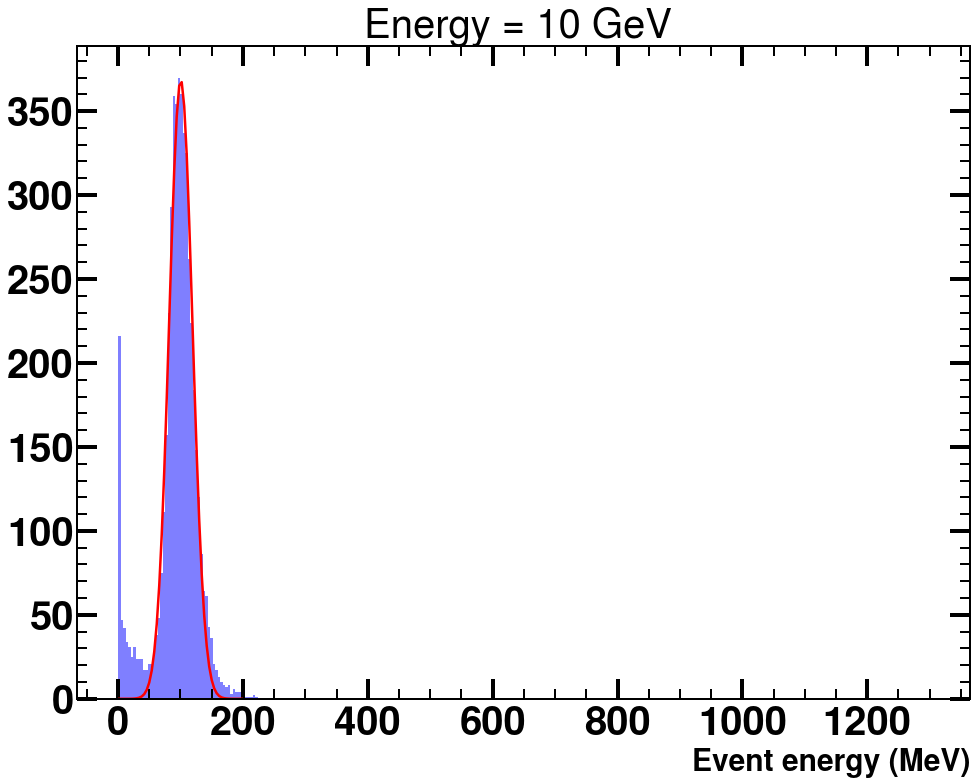

R2 0.9725961569003525


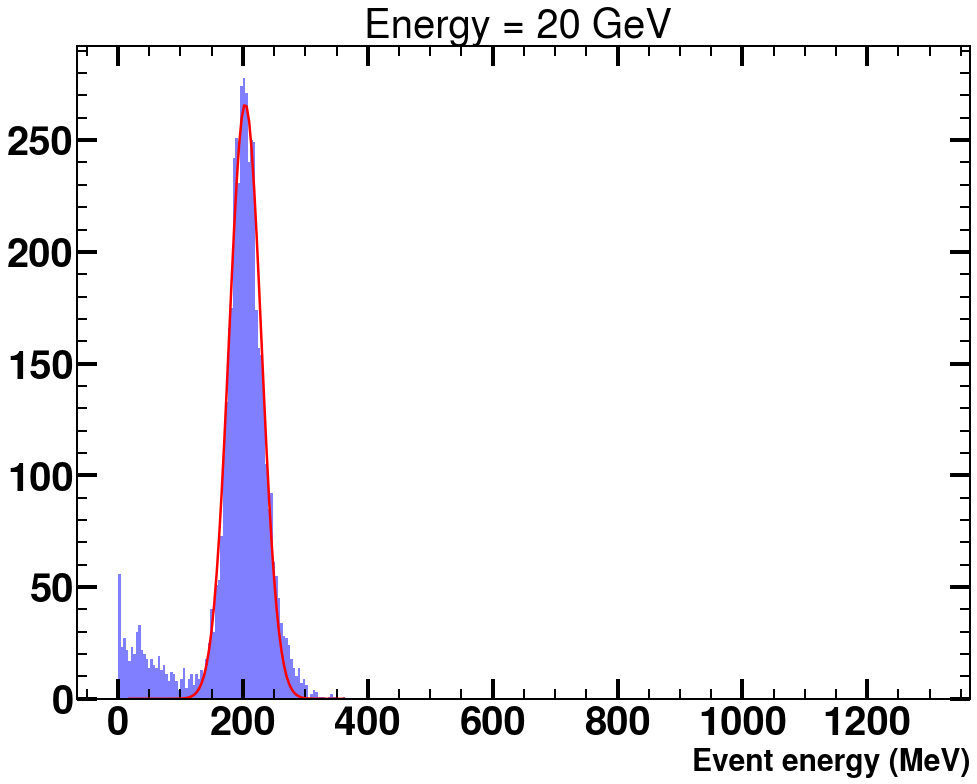

R2 0.9792660479266828


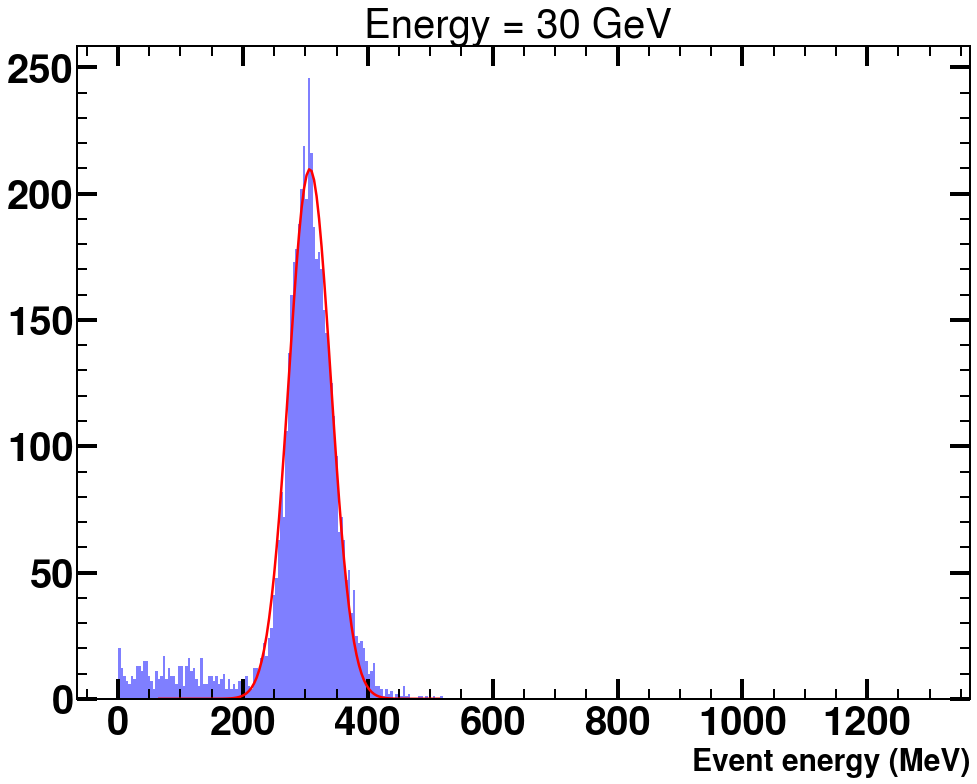

R2 0.9801116670285714


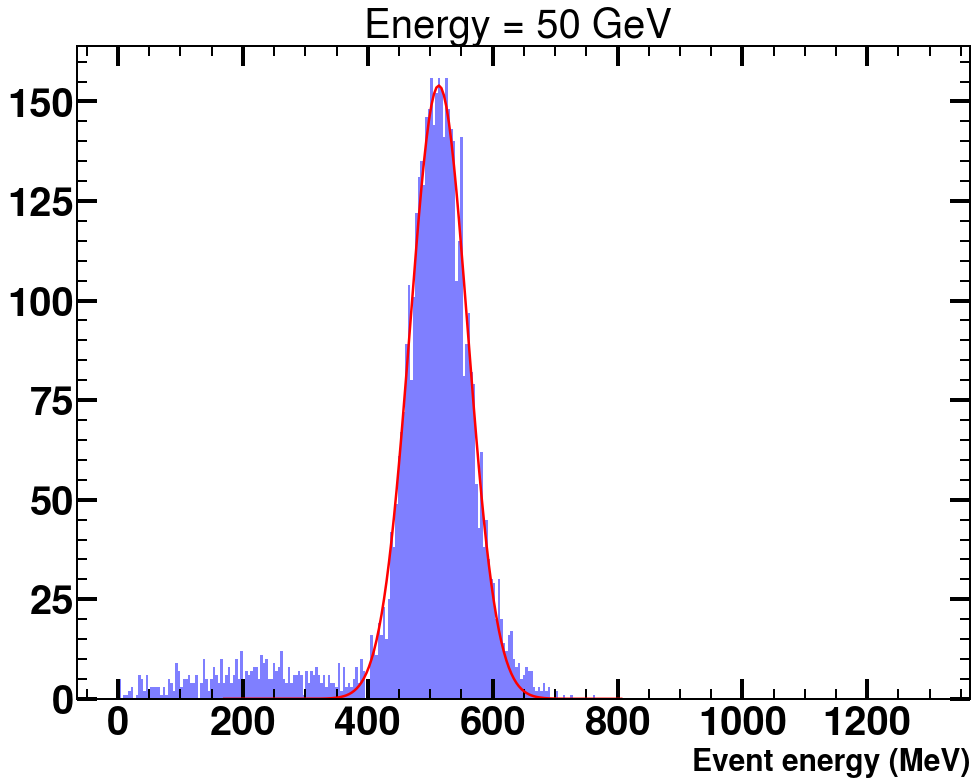

R2 0.9710904483020943


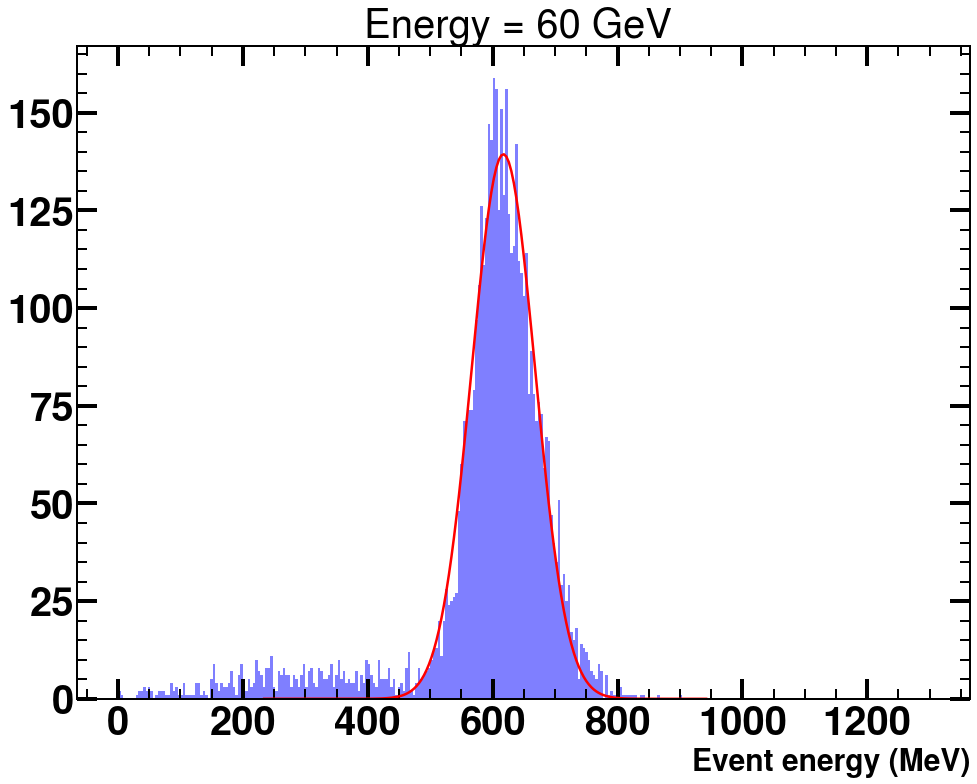

R2 0.9801407724051445


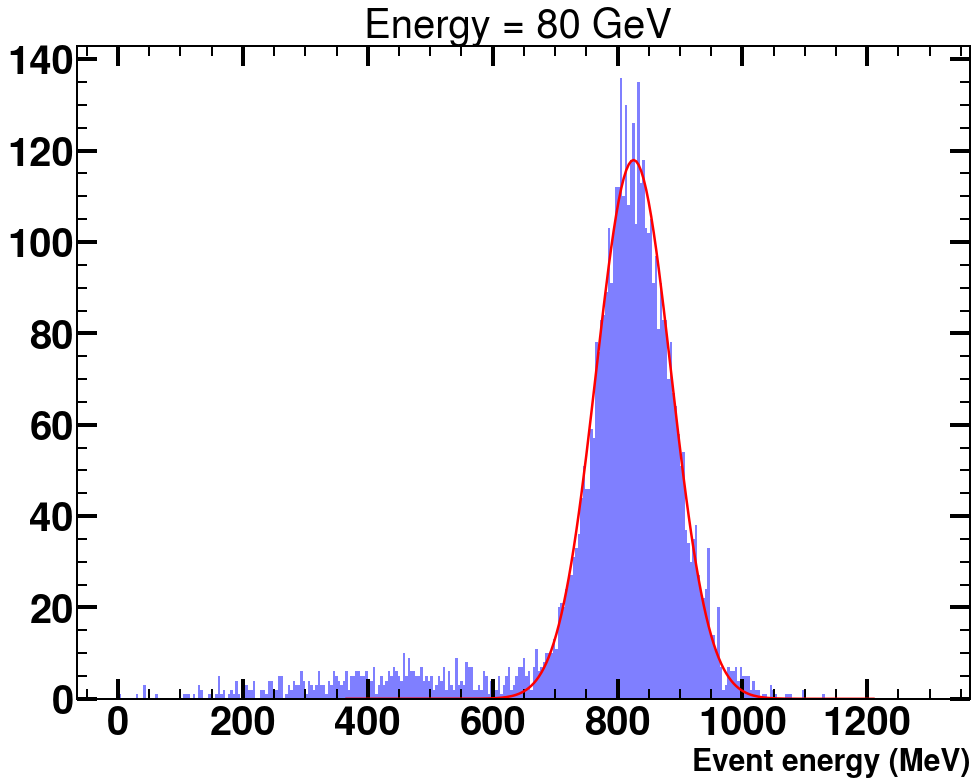

R2 0.9693264128976526


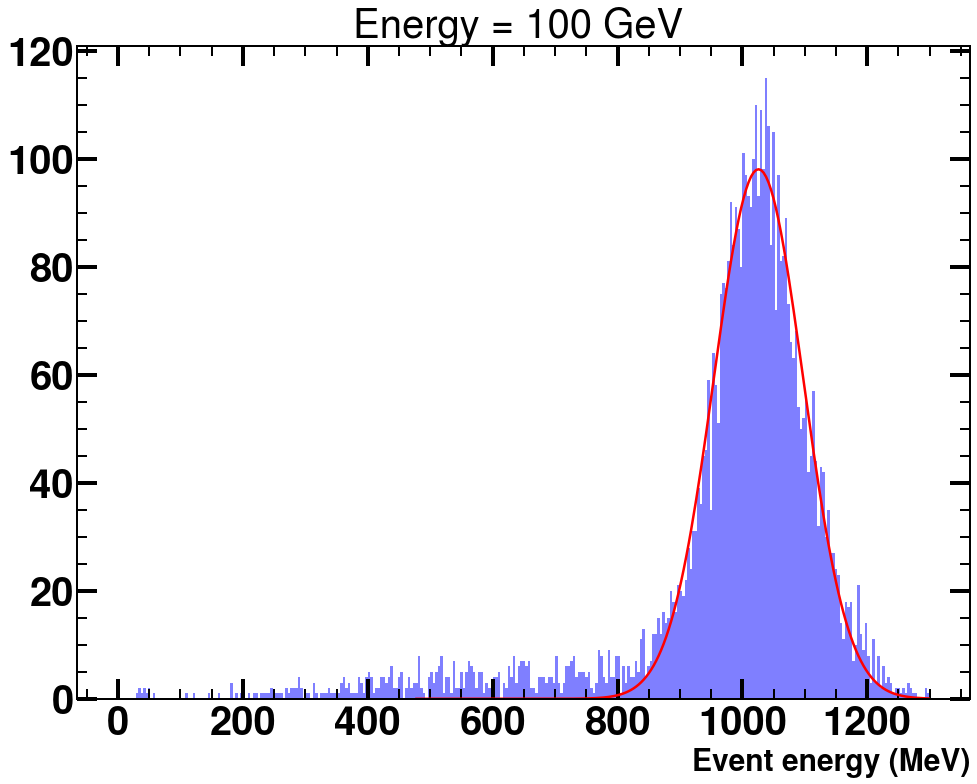

pi_means=[ [ 100.5133   203.68912  307.13091  513.71898  617.23463  825.73167
 1025.86053] ]
pi_means_error=[ [0.93065144 0.5581127  0.56463969 0.63945081 0.81940981 0.70987842
 1.05781342] ]
pi_stds=[ [18.72991 25.8973  33.55181 46.00459 50.75197 60.05924 71.3961 ] ]
pi_stds_error=[ [0.93065145 0.55811271 0.5646397  0.63945083 0.81940982 0.70987843
 1.05781985] ]
pi_leaks_per=[ [10.64       10.76        9.66        9.68        9.88        9.72
 10.16609966] ]
pi_leaks_per_error=[ [0.48522358 0.48821667 0.46028591 0.46080417 0.46596446 0.46183945
 0.47341988] ]
pi_resolutions=[ [0.1863426  0.12714131 0.10924269 0.08955205 0.08222475 0.07273458
 0.0695963 ] ]
pi_resolutions_errors=[ [0.009418368496118866, 0.0027620795619380557, 0.0018493706596625725, 0.0012497295177745949, 0.0013320301349152137, 0.000861967288532913, 0.001033647898667904] ]


"   \nprint('el_means=',np.array2string(np.around(el_means,3),separator=','))\n      \nprint('el_means_error=',np.array2string(np.around(el_means_error,5),separator=','))\n\nprint('el_stds=',np.array2string(np.around(el_stds,3),separator=','))\nprint('el_stds_error=',np.array2string(np.around(el_stds_error,5),separator=','))\n\nprint('el_leaks_per=',np.array2string(np.around(el_leaks_per,4),separator=','))\nprint('el_leaks_per_error=',np.array2string(np.around(el_leaks_per_error,5),separator=','))\n\n\nprint('el_resolutions=',np.array2string(np.around(el_resolutions,9),separator=','))\nprint('el_resolutions_errors=',np.array2string(np.around(el_resolution_errors,7),separator=','))\n"

In [4]:
pi_means=[]
pi_stds=[]
pi_resolutions=[]
pi_resolution_errors=[]
pi_means_error=[]
pi_stds_error=[]
pi_leaks_per=[]
pi_leaks_per_error=[]

el_means=[]
el_stds=[]
el_resolutions=[]
el_resolution_errors=[]
el_means_error=[]
el_stds_error=[]
el_leaks_per=[]
el_leaks_per_error=[]

energies=[10,20,30,50,60,80,100]
#energies=[80]
for ienergy in energies:
    
    particle='pi-'
    ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile(ienergy,theta,particle,Time_Threshold,Energy_Threshold)

    ### PLOTS ZPOS, YPOS, ZPOS, ENERGY

    #plots.distribution_1D(ene,'Energy',ienergy,particle)
    #plots.distribution_1D(ene,'x_pos',ienergy,particle)
    #plots.distribution_1D(ene,'y_pos',ienergy,particle)
    #plots.XY_plot2D(PosRecoX,PosRecoY, ienergy, particle)

    ########### GET FITTED PARAMETER AND LEAKAGE 
    
    pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error=plots.get_resolution(ene_good, ienergy, particle,Sigma_For_leakage)  


    pi_resolution=(pi_std/pi_mean)
    pi_resolution_error=(np.sqrt((pi_sigma_error/pi_std)**2 + (pi_mean_error/pi_mean)**2))*pi_resolution
    pi_means.append(pi_mean)
    pi_stds.append(pi_std)
    pi_means_error.append(pi_mean_error)
    pi_stds_error.append(pi_sigma_error)
    pi_resolutions.append(pi_resolution)
    pi_resolution_errors.append(pi_resolution_error)
    pi_leaks_per.append(pi_leak_per)
    pi_leaks_per_error.append(pi_leak_per_error)
    
    
    
    ######### NOW FOR THE ELECTRONS
    
    particle='e-'
    ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile(ienergy,theta,particle,Time_Threshold,Energy_Threshold)
    el_mean, el_std, el_mean_error, el_sigma_error, el_leak_per, el_leak_per_error=plots.get_resolution(ene_good,  ienergy, particle,Sigma_For_leakage)
    el_resolution=(el_std/el_mean)
    el_resolution_error=(np.sqrt((el_sigma_error/el_std)**2 + (el_mean_error/el_mean)**2))*el_resolution
    el_means.append(el_mean)
    el_stds.append(el_std)
    el_means_error.append(el_mean_error)
    el_stds_error.append(el_sigma_error)
    el_resolutions.append(el_resolution)
    el_resolution_errors.append(el_resolution_error)
    el_leaks_per.append(el_leak_per)
    el_leaks_per_error.append(el_leak_per_error)
       
print('pi_means=[',np.around(pi_means,5),']')
print('pi_means_error=[',np.around(pi_means_error,8),']')

print('pi_stds=[',np.around(pi_stds,5),']')
print('pi_stds_error=[',np.around(pi_stds_error,8),']')

print('pi_leaks_per=[',np.around(pi_leaks_per,9),']')
print('pi_leaks_per_error=[',np.around(pi_leaks_per_error,9),']')


print('pi_resolutions=[',np.around(pi_resolutions,9),']')
print('pi_resolutions_errors=[',pi_resolution_errors,']')


  
print('el_means=',np.array2string(np.around(el_means,3),separator=','))
      
print('el_means_error=',np.array2string(np.around(el_means_error,5),separator=','))

print('el_stds=',np.array2string(np.around(el_stds,3),separator=','))
print('el_stds_error=',np.array2string(np.around(el_stds_error,5),separator=','))

print('el_leaks_per=',np.array2string(np.around(el_leaks_per,4),separator=','))
print('el_leaks_per_error=',np.array2string(np.around(el_leaks_per_error,5),separator=','))


print('el_resolutions=',np.array2string(np.around(el_resolutions,9),separator=','))
print('el_resolutions_errors=',np.array2string(np.around(el_resolution_errors,7),separator=','))

    


    
    

#np.set_printoptions(precision=6)
#print(pi_resolution_errors)

#


#np.set_printoptions(precision=1)

### Resolution plots for the pions

[18.63 12.71 10.92  8.95  8.22  7.27  6.93]


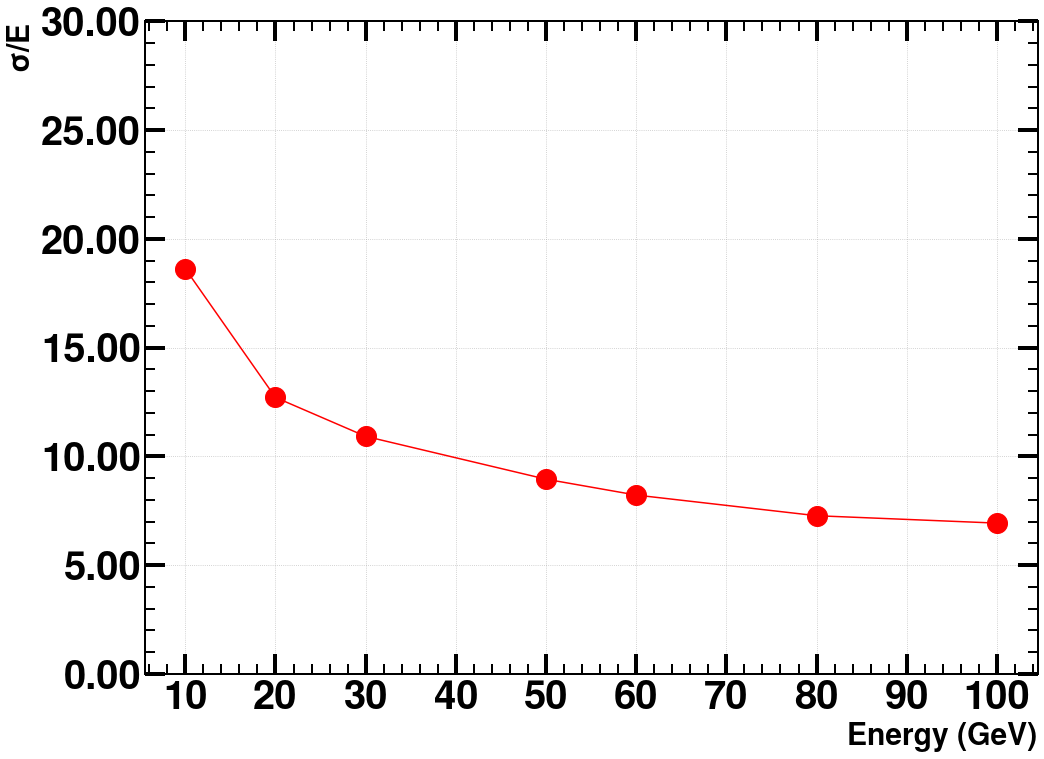

<class 'numpy.ndarray'> slope     <class 'numpy.float64'>
115.6513927320459


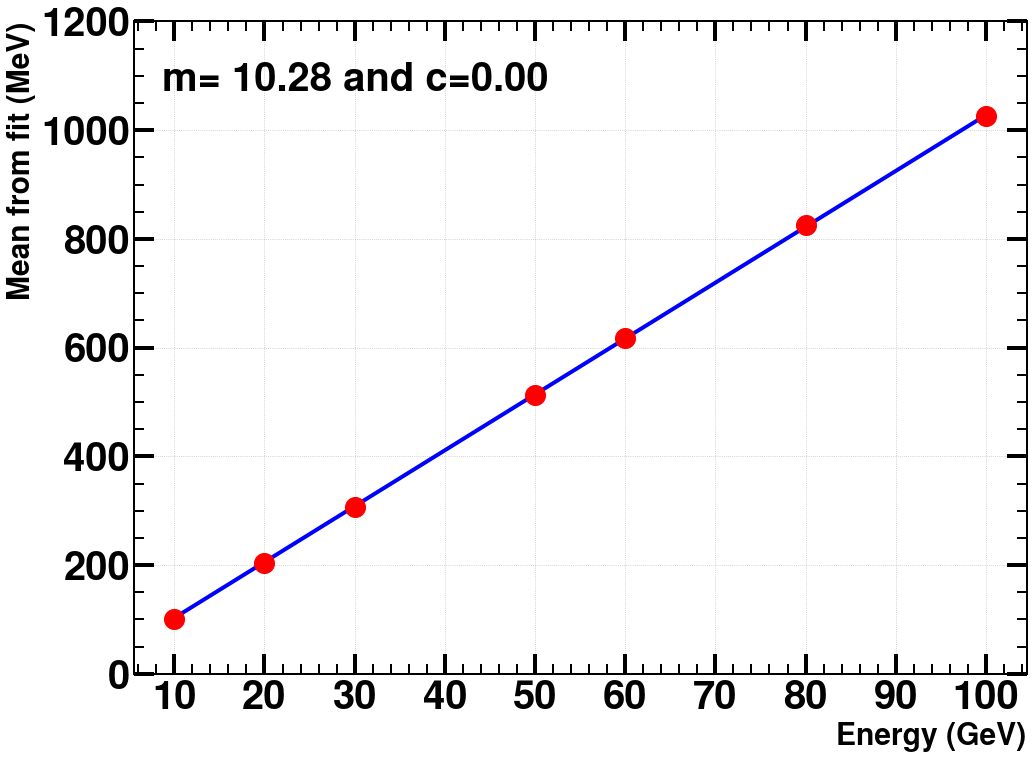

[ 100.513  203.689  307.13   513.718  617.234  825.731 1025.764] [ 10  20  30  50  60  80 100]


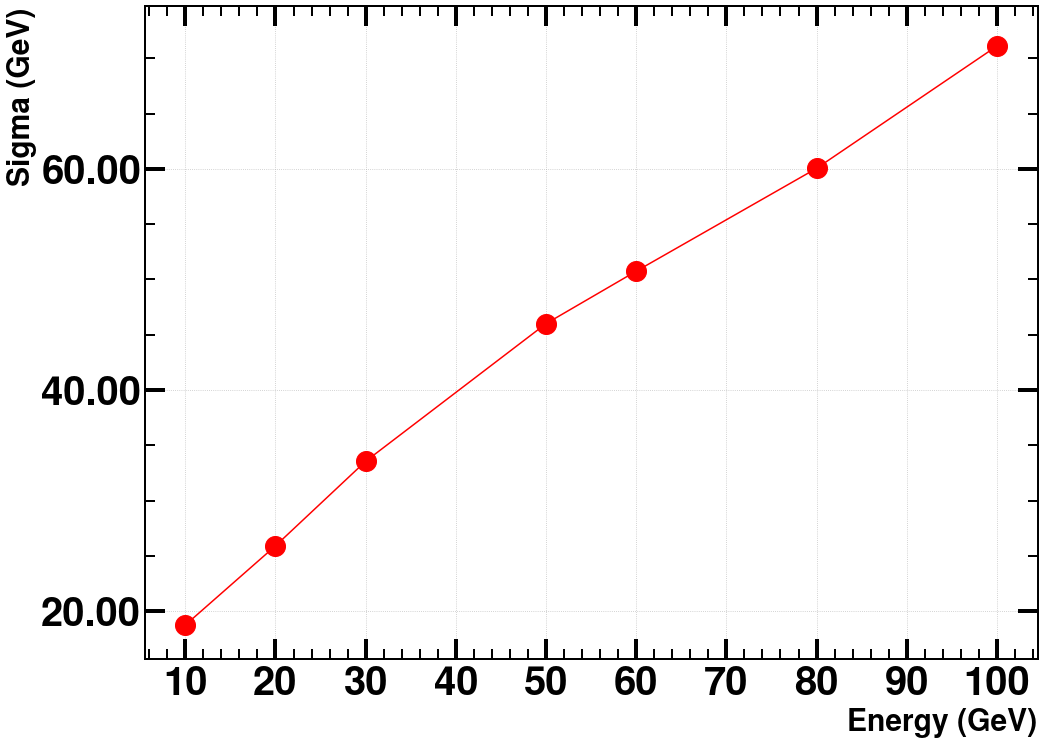

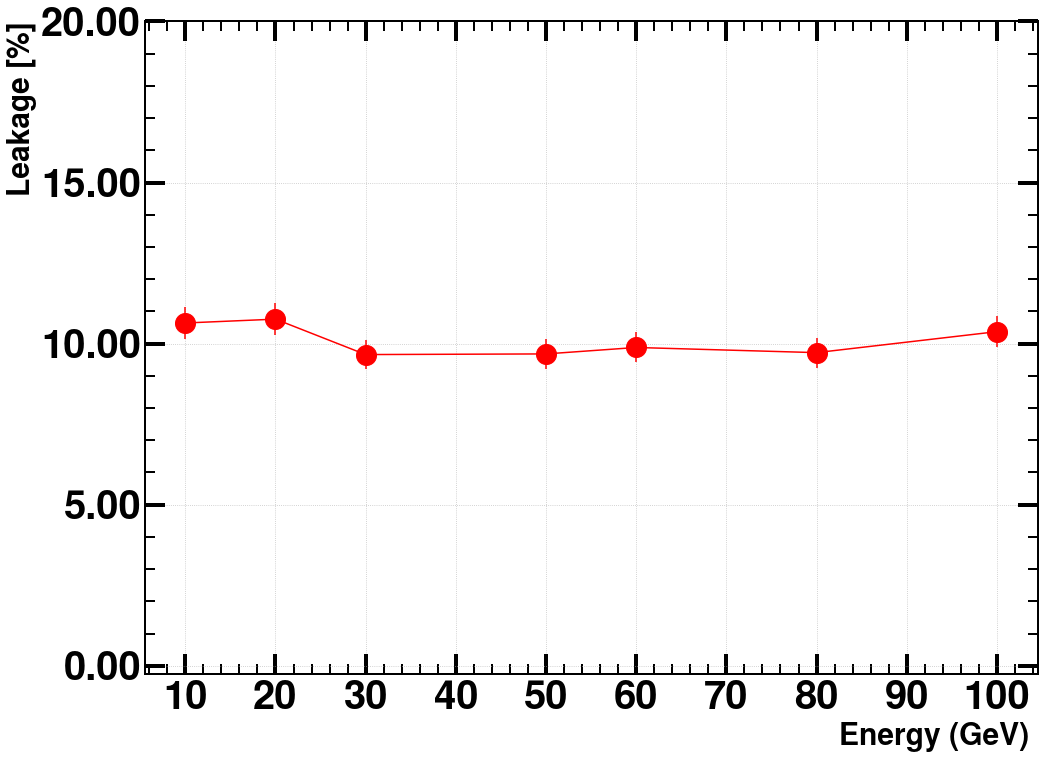

In [4]:

energies=[10,20,30,50,60,80,100]
pi_means=[ 100.513,  203.689,  307.130,  513.718,  617.234,  825.731, 1025.764 ]
pi_means_error=[0.3702, 0.3394, 0.3763, 0.4931, 0.652,  0.6244, 0.8900 ]
pi_stds=[18.729, 25.897, 33.551, 46.004, 50.751, 60.059, 71.124 ]
pi_stds_error=[ 0.3702, 0.3394, 0.3763, 0.4931, 0.652,  0.6244, 0.8985]
pi_leaks_per=[ 10.64, 10.76,  9.66,  9.68,  9.88,  9.72, 10.371423]
pi_leaks_per_error=[ 0.4852, 0.4882, 0.4602, 0.4608, 0.4659, 0.4618, 0.482]
pi_resolutions=[ 0.1863, 0.1271, 0.1092, 0.0895, 0.0822, 0.0727, 0.0693]
pi_resolutions_errors=[0.003746, 0.00167980, 0.00123261, 0.0009637789, 0.00106031, 0.000758210, 0.00087804]


plots.plot_resolution(energies,'pi-',pi_means, pi_stds, pi_means_error, pi_stds_error, pi_resolutions, pi_resolutions_errors, pi_leaks_per,pi_leaks_per_error,Sigma_For_leakage)   

### Resolution plots for the electrons

[15.934352 11.130558  8.842132  6.847473  6.224724  8.239772  9.666697]


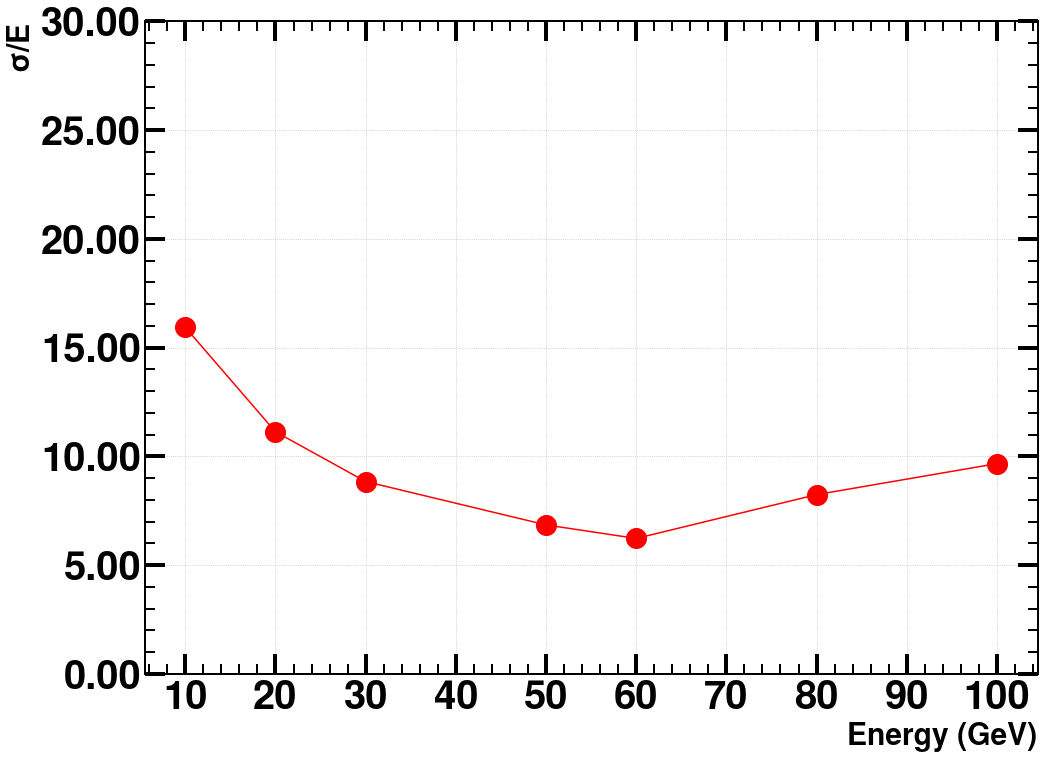

<class 'numpy.ndarray'> slope     <class 'numpy.float64'>
8900.335233305375


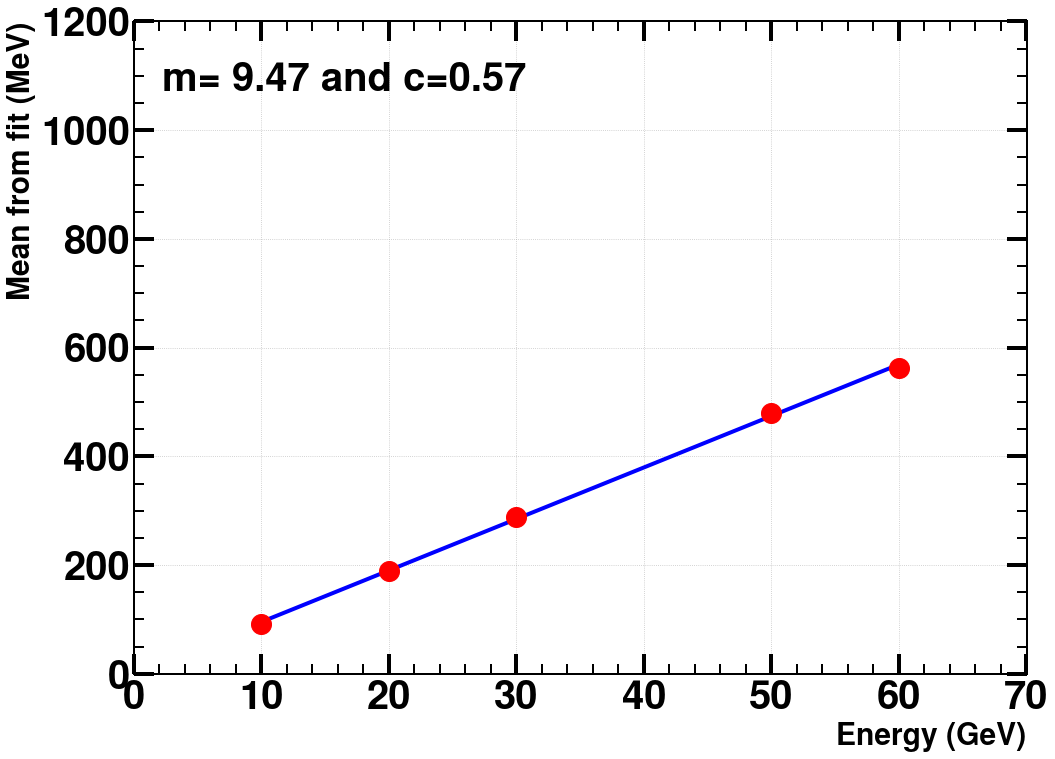

[ 92.406 189.962 287.916 480.005 563.283 694.14  796.799] [ 10  20  30  50  60  80 100]


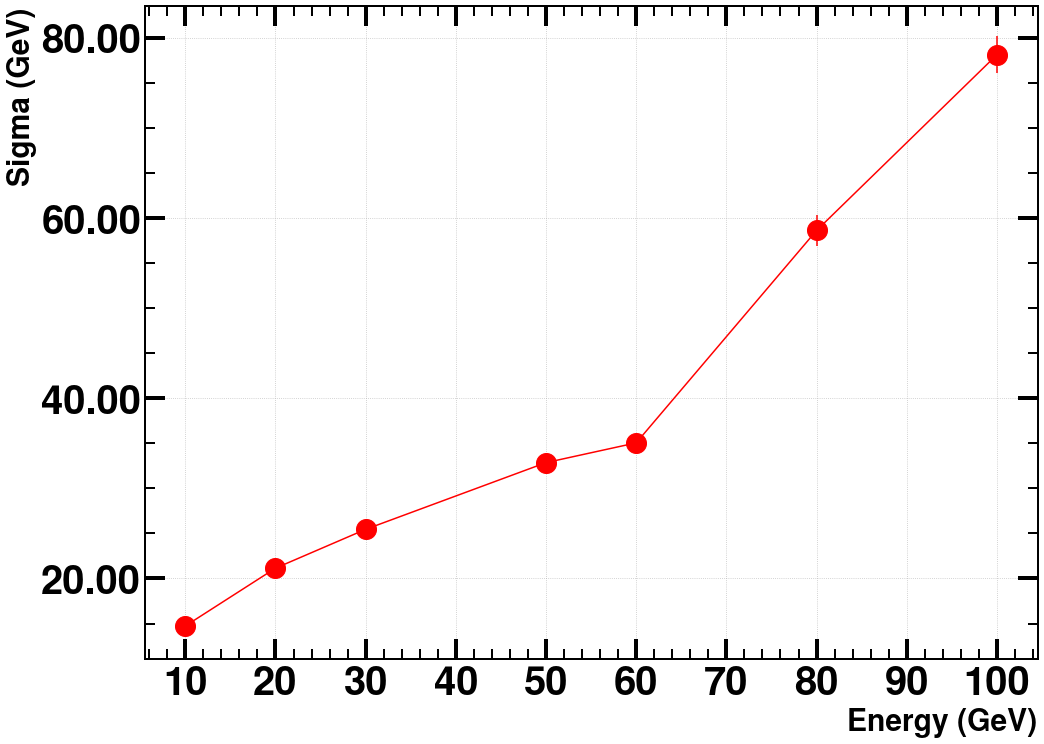

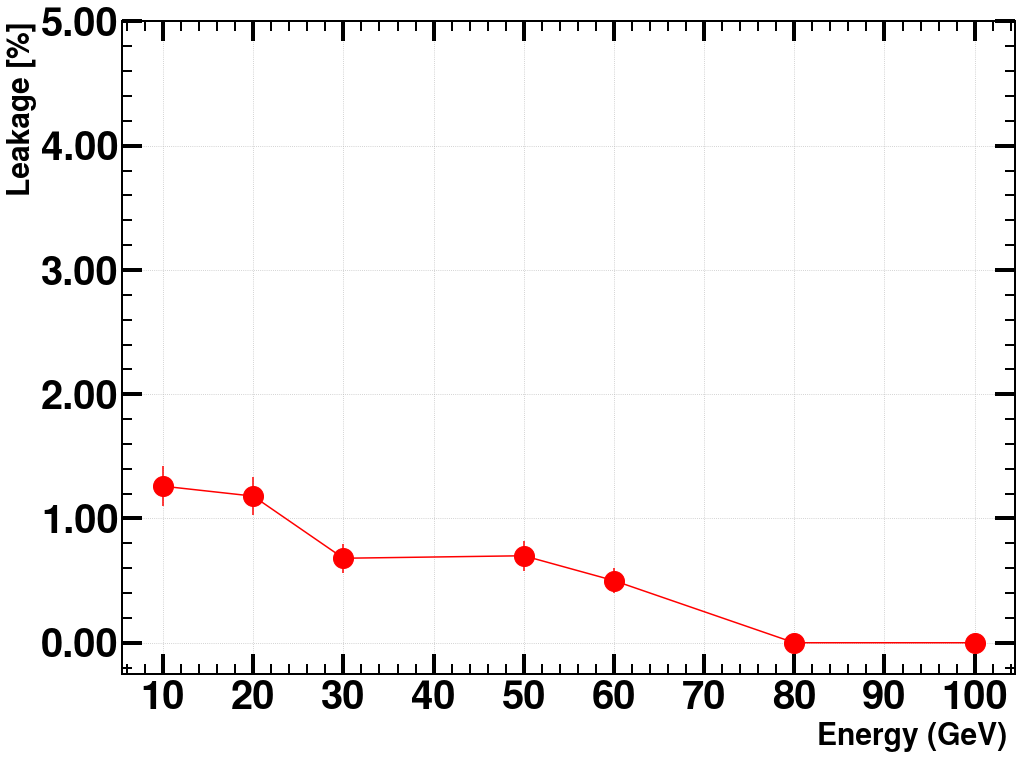

In [4]:
energies=[10,20,30,50,60,80,100]

el_means= [ 92.406,189.962,287.916,480.005,563.283,694.14,796.799]
el_means_error= [0.35074,0.33654,0.43665,0.49562,0.3518 ,1.49 ,1.8745]

el_stds= [14.724,21.144,25.458,32.868,35.063,58.651,78.167]
el_stds_error= [0.35089,0.33674,0.43691,0.49616,0.35211,1.698,2.069]
el_leaks_per= [1.26,1.18,0.68,0.7 ,0.5 ,0.  ,0.  ]
el_leaks_per_error= [0.15974,0.15453,0.11701,0.11873,0.10025,0.     ,0.     ]
el_resolutions= [0.15934352,0.11130558,0.08842132,0.06847473,0.06224724,0.08239772, 0.09666697]
el_resolutions_errors= [0.0038451,0.0017836,0.0015234,0.0010361,0.0006263,0.0017666,0.0019954]


plots.plot_resolution(energies,'el-',el_means, el_stds, el_means_error, el_stds_error, el_resolutions, el_resolutions_errors, el_leaks_per,el_leaks_per_error,Sigma_For_leakage)

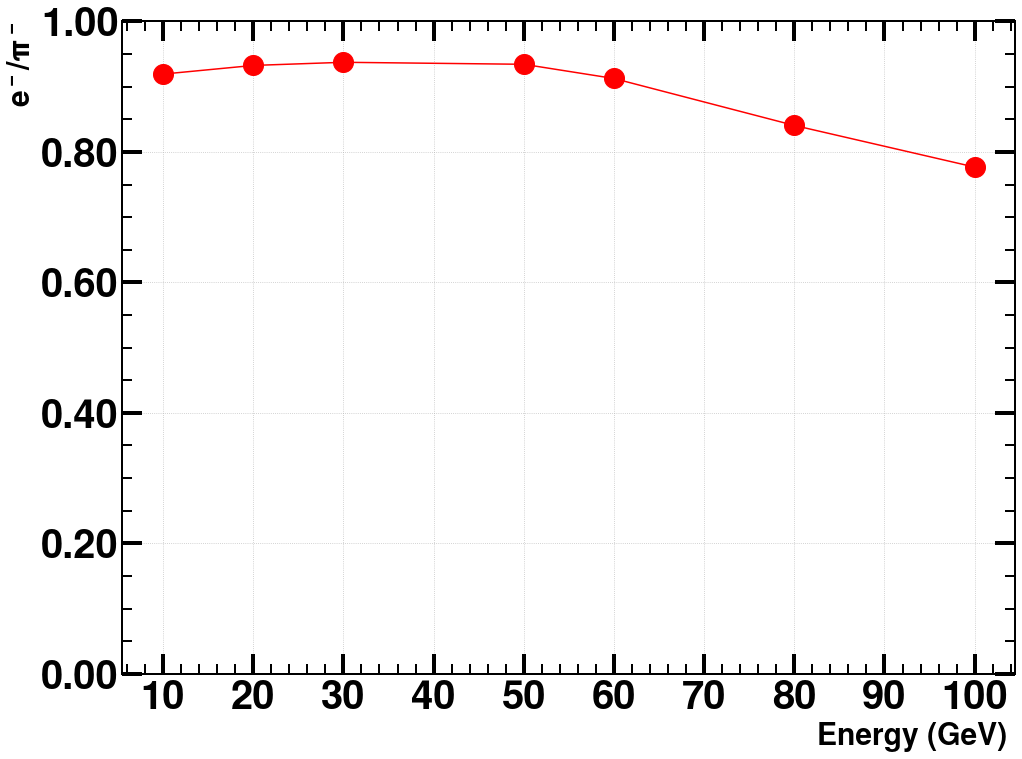

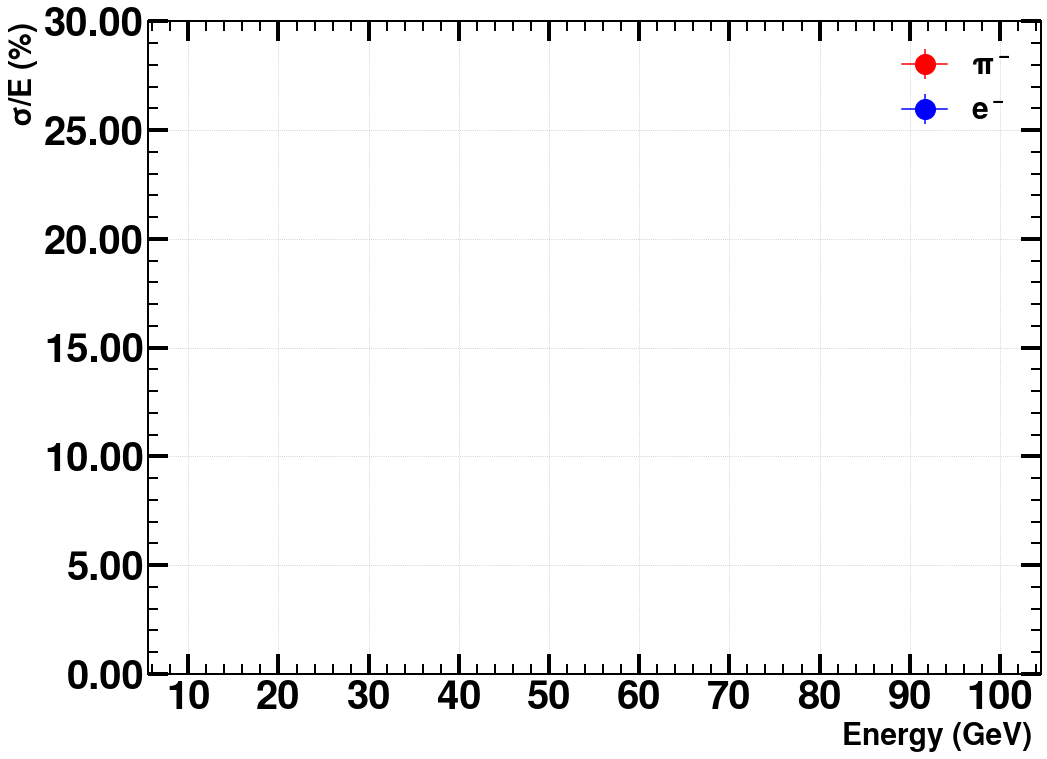

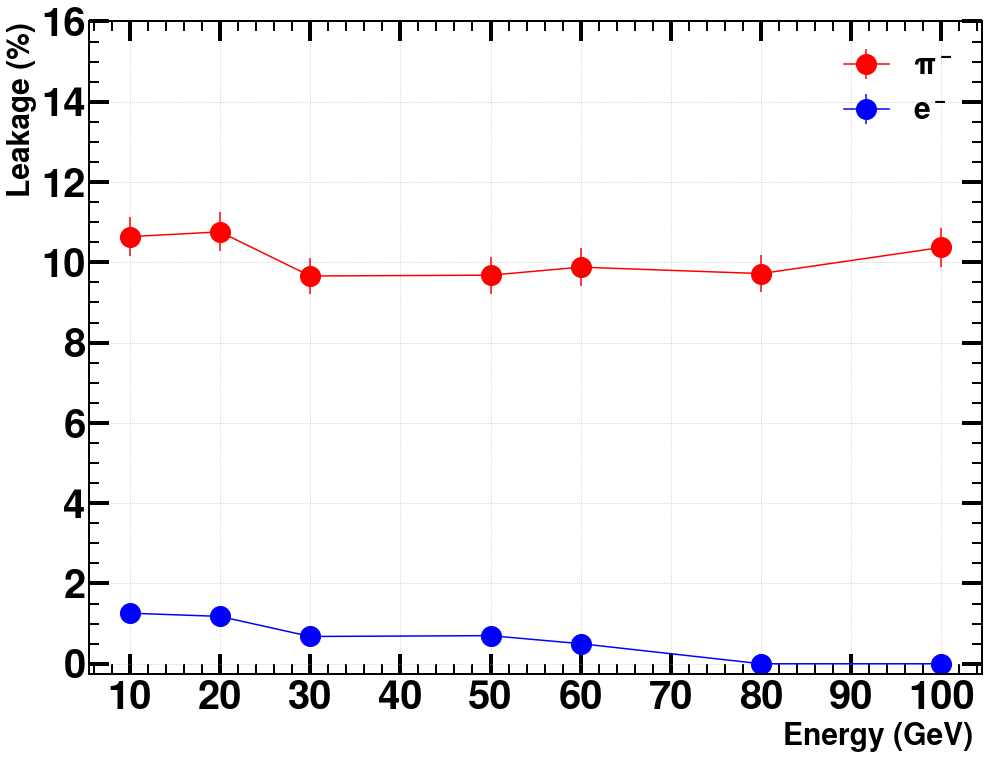

In [7]:
PathToPlot='/home/bishnu/UCR_EIC/Plots/hepmc/'

ratio=np.divide(el_means,pi_means)
Del_e=np.divide(el_means_error,el_means)
Del_p=np.divide(pi_means_error, pi_means)
abs_delta=np.sqrt((Del_e/el_means)**2 + (Del_p/pi_means)**2) *ratio
############### e/h ############
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies,ratio, abs_delta,color="red",marker='o',markersize=20,label='Reconstructed')

#ax.plot(energies,resolutions, color="blue",marker='*',label="Generated")
ax.set_ylabel('$e^-$/$\pi^-$')
ax.set_xlabel('Energy (GeV) ')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,1)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("$e^-$/$\pi^-$")
FigName="eh_ratio_Energy.png"
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()


#### Resolutions
el_resolutions=np.multiply(el_resolutions,100)
el_resolutions_errors=np.multiply(el_resolutions_errors,100)
pi_resolutions=np.multiply(pi_resolutions,100)
pi_resolutions_errors=np.multiply(pi_resolutions_errors,100)
#print(el_resolutions)
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies,pi_resolutions, pi_resolutions_errors ,color="red",marker='o',markersize=20,label='$\pi^-$')
ax.errorbar(energies,el_resolutions, el_resolutions_errors,color="blue",marker='o',markersize=20,label='$e^-$')
ax.set_ylabel('$\sigma$/E (%)')
ax.set_xlabel('Energy (GeV) ')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,30)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Res_e_pi_Energy.png"
plt.legend()
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()


######## Leaks comparision ###########

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies,pi_leaks_per, pi_leaks_per_error ,color="red",marker='o',markersize=20,label='$\pi^-$')
ax.errorbar(energies,el_leaks_per, el_leaks_per_error,color="blue",marker='o',markersize=20,label='$e^-$')

ax.set_ylabel('Leakage (%)')
ax.set_xlabel('Energy (GeV) ')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(-0.25,16)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Leakage_e_pi_Energy.png"
plt.legend()
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()


In [8]:
print('el_means=[',np.around(el_means,5),']')
print('el_means_error=[',np.around(el_means_error,8),']')

print('el_stds=[',np.around(el_stds,5),']')
print('el_stds_error=[',np.around(el_stds_error,8),']')

print('el_leaks_per=[',np.around(el_leaks_per,9),']')
print('el_leaks_per_error=[',np.around(el_leaks_per_error,9),']')


print('el_resolutions=[',np.around(el_resolutions,9),']')
print('el_resolutions_errors=[',el_resolution_errors,']')

el_means=[ [ 92.406 189.962 287.916 480.005 563.283 694.14  796.799] ]
el_means_error=[ [0.35074 0.33654 0.43665 0.49562 0.3518  1.49    1.8745 ] ]
el_stds=[ [14.724 21.144 25.458 32.868 35.063 58.651 78.167] ]
el_stds_error=[ [0.35089 0.33674 0.43691 0.49616 0.35211 1.698   2.069  ] ]
el_leaks_per=[ [1.26 1.18 0.68 0.7  0.5  0.   0.  ] ]
el_leaks_per_error=[ [0.15974 0.15453 0.11701 0.11873 0.10025 0.      0.     ] ]
el_resolutions=[ [15.934352 11.130558  8.842132  6.847473  6.224724  8.239772  9.666697] ]
el_resolutions_errors=[ [] ]


In [9]:
array=[  5.,   2. ,  5. ,  1.,  11.,   8.,   5.,   6.,   4.,   4.,   9.,  11.,  10.,  10.,
  10.,  10.,   4. , 15.,   7.,  14.,  14.,  10. , 12. , 16.,  17.,  10.,  13.,  16.,
  16.,  19.,  10.,  16.,  20.,   9.,  12.,  12.,  13.,   8.,  11.,  14.,  10.,   9.,
  10.,   7.,  11.,  11.,   7]
np.sum(array)
       

484.0

In [10]:
import math
theta_to_rad=math.pi/180.
thetas=np.array([2.32,2.56,2.83,3.13,3.46,3.82,4.23])
etas=np.array([3.9,3.8,3.7,3.6,3.5,3.4,3.3])
minus_theta=180-thetas
theta_rad_half=np.sin(thetas*theta_to_rad/2.0)

calc_etas=np.log(theta_rad_half)*-1.0

diff_eta=calc_etas-etas
np.set_printoptions(precision=2)
#print(diff_eta)  
print(calc_etas)

[3.9 3.8 3.7 3.6 3.5 3.4 3.3]
